In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
path = r"D:\UTH-CVIP-assignments\Solutions\Lab 2 (Chapter 2.1)\Bài tập nâng cao\Question 1\original.jpg"

# hỗ trợ đọc đường dẫn có dấu tiếng việt
img = cv2.imdecode(
    np.fromfile(path, dtype=np.uint8),
    cv2.IMREAD_COLOR
)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [11]:
# Định nghĩa các kernel
kernel_4 = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)

kernel_8 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
], dtype=np.float32)

kernel_unsharp = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
], dtype=np.float32)

kernel_highpass = np.array([
    [0, -1,  0],
    [-1, 5, -1],
    [0, -1,  0]
], dtype=np.float32)


In [12]:
# EDGE MAP
edge_4 = cv2.filter2D(img_gray, cv2.CV_64F, kernel_4)
edge_8 = cv2.filter2D(img_gray, cv2.CV_64F, kernel_8)

# SHARPEN (gốc - biên)
alpha = 1.0
sharp_4 = np.clip(img_gray.astype(np.float64) - alpha * edge_4, 0, 255).astype(np.uint8)
sharp_8 = np.clip(img_gray.astype(np.float64) - alpha * edge_8, 0, 255).astype(np.uint8)

# Trực tiếp bằng kernel
sharp_unsharp = cv2.filter2D(img_gray, -1, kernel_unsharp)
sharp_highpass = cv2.filter2D(img_gray, -1, kernel_highpass)



In [13]:
    # Áp dụng kernel cho từng kênh màu
sharpen_color_4 = np.zeros_like(img_rgb)
sharpen_color_8 = np.zeros_like(img_rgb)
sharpen_color_unsharp = cv2.filter2D(img_rgb, -1, kernel_unsharp)
sharpen_color_highpass = cv2.filter2D(img_rgb, -1, kernel_highpass)

for i in range(3):  # R, G, B
    channel = img_rgb[:, :, i].astype(np.float64)
    
    # Laplacian 4-kết nối
    edge_4_c = cv2.filter2D(img_rgb[:, :, i], cv2.CV_64F, kernel_4)
    sharpen_color_4[:, :, i] = np.clip(channel - alpha * edge_4_c, 0, 255).astype(np.uint8)
    
    # Laplacian 8-kết nối (TỐT NHẤT)
    edge_8_c = cv2.filter2D(img_rgb[:, :, i], cv2.CV_64F, kernel_8)
    sharpen_color_8[:, :, i] = np.clip(channel - alpha * edge_8_c, 0, 255).astype(np.uint8)

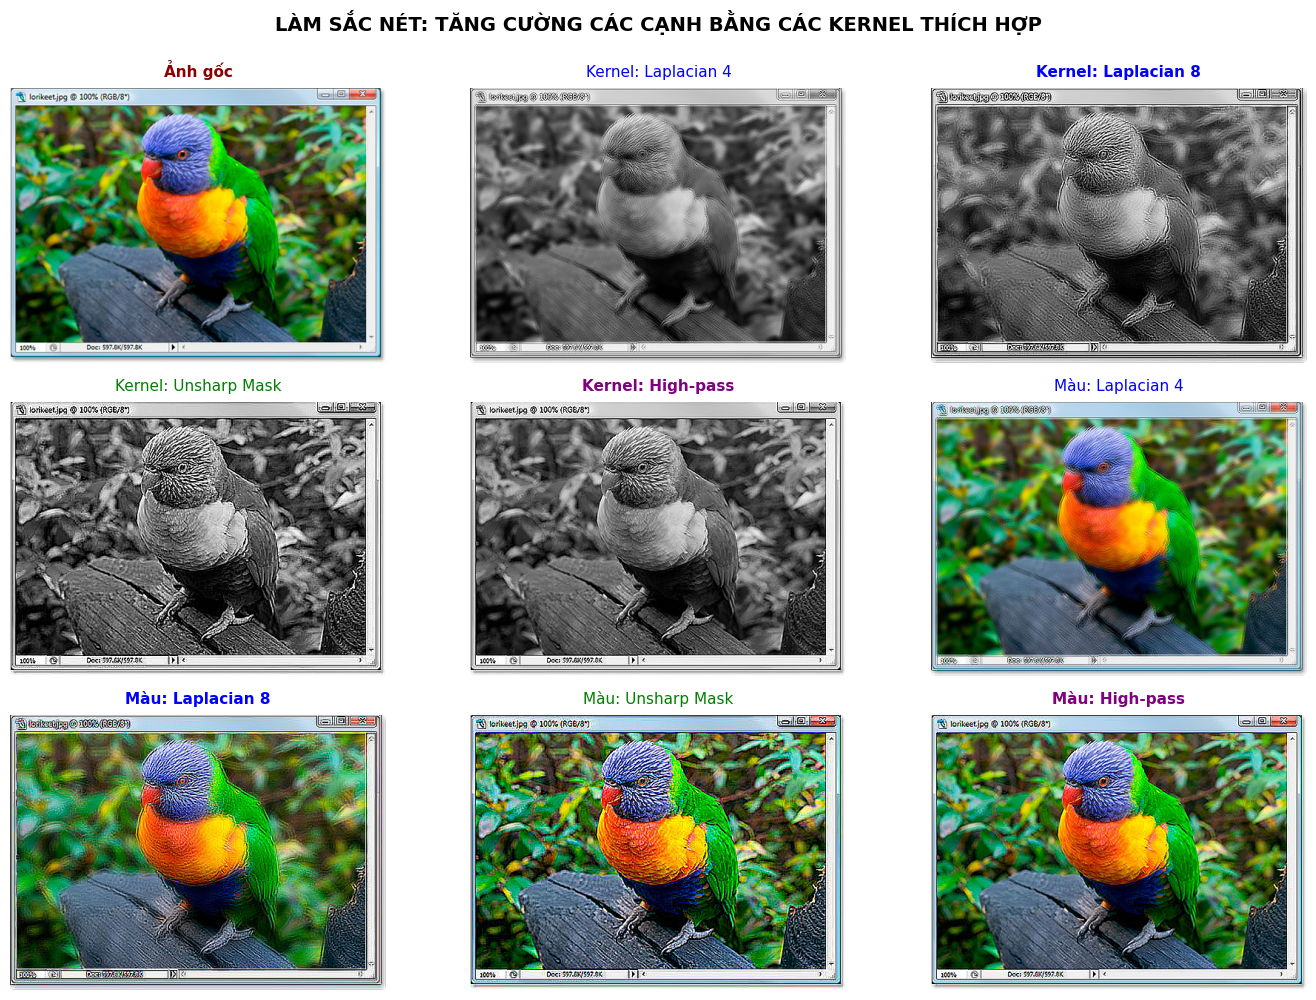

In [15]:
fig = plt.figure(figsize=(14, 10))
fig.suptitle('LÀM SẮC NÉT: TĂNG CƯỜNG CÁC CẠNH BẰNG CÁC KERNEL THÍCH HỢP', 
                fontsize=14, fontweight='bold', y=0.995)

plt.subplot(3, 3, 1)
plt.imshow(img_rgb)
plt.title('Ảnh gốc', fontsize=11, fontweight='bold', color='darkred', pad=8)
plt.axis("off")

plt.subplot(3, 3, 2)
plt.imshow(sharp_4, cmap='gray')
plt.title('Kernel: Laplacian 4', fontsize=11, color='blue', pad=8)
plt.axis("off")

plt.subplot(3, 3, 3)
plt.imshow(sharp_8, cmap='gray')
plt.title('Kernel: Laplacian 8', fontsize=11, color='blue', fontweight='bold', pad=8)
plt.axis("off")

plt.subplot(3, 3, 4)
plt.imshow(sharp_unsharp, cmap='gray')
plt.title('Kernel: Unsharp Mask', fontsize=11, color='green', pad=8)
plt.axis("off")

plt.subplot(3, 3, 5)
plt.imshow(sharp_highpass, cmap='gray')
plt.title('Kernel: High-pass', fontsize=11, color='purple', fontweight='bold', pad=8)
plt.axis("off")

# Ô 6-9: 4 ảnh Màu sau tăng cường cạnh
plt.subplot(3, 3, 6)
plt.imshow(sharpen_color_4)
plt.title('Màu: Laplacian 4', fontsize=11, color='blue', pad=8)
plt.axis("off")

plt.subplot(3, 3, 7)
plt.imshow(sharpen_color_8)
plt.title('Màu: Laplacian 8', fontsize=11, color='blue', fontweight='bold', pad=8)
plt.axis("off")

plt.subplot(3, 3, 8)
plt.imshow(sharpen_color_unsharp)
plt.title('Màu: Unsharp Mask', fontsize=11, color='green', pad=8)
plt.axis("off")

plt.subplot(3, 3, 9)
plt.imshow(sharpen_color_highpass)
plt.title('Màu: High-pass', fontsize=11, color='purple', fontweight='bold', pad=8)
plt.axis("off")

plt.subplots_adjust(left=0.05, right=0.95, top=0.96, bottom=0.02, 
                    hspace=0.15, wspace=0.1)

plt.tight_layout()
plt.savefig(r"D:\UTH-CVIP-assignments\Solutions\Lab 2 (Chapter 2.1)\Lọc tuyến tính\Question 3\result.png", dpi=150)
plt.show()

